# Exploratory analysis on openFDA platform
### Alexandre Navarro

## Content description

- Here we examining the occurence of adverse effects, medications taken together and some other interesting phenomena by country of origin.

- To aid in the data wrangling, use the utils file enclosed.

Next, we load the libraries that are used in this exploratory analysis (all pretty standard data-science material).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

matplotlib.style.use('ggplot') # Adjust plot style so that graphs are more asthetically pleasing.
plt.rcParams['figure.figsize'] = (10, 6) # Adjust figure size so that it's not too small for reading labels and axis.

Here we specify a search to obtain a subset of 5000 patients that take medication for hypertension (we could just as well analyse other types of conditions, e.g. pulmonary insufficiency, dissociative conjunctive tissue, etc.)

We also use the utility to parsed the data obtained from the JSON query to the API and restricted the data to the variables we want to analyse. (This task could also be done using say <a href="https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary">this post</a>, but the removal of several missing keys would make the process less understandable).

In [2]:
# Lookup only patients medicated for hypertension
search = 'patient.drug.drugindication:hypertension'

# Execute query and get encodings
data = utils.get_data(search, limit_param=5000)
df, encodings = utils.parse_data(data)
df.head() # Inspect the top of the data frame.

,Patient,Age,Sex,Country,Source,Seriousness,Death,Disabling,Life Threatening,Hospitalization,Other serious,Drug,Manufacturer,Reaction,Outcome
0,0,65,2,0,1,2,0,0,0,0,0,0,0,0,6
1,0,65,2,0,1,2,0,0,0,0,0,1,1,0,6
2,0,65,2,0,1,2,0,0,0,0,0,0,0,0,6
3,1,59,2,0,1,2,0,0,0,0,0,0,0,1,6
4,1,59,2,0,1,2,0,0,0,0,0,0,0,2,6


Let's see which countries have been reported

In [3]:
all_countries = df['Country'].unique()
print('Total number of countries in the query: %d' % (all_countries.size))

country_codes = list()
for country_uid in all_countries:
    country_codes.append(encodings['country'][country_uid])

print('Countries: ' + ", ".join(country_codes))

Total number of countries in the query: 49
Countries: US, GB, BR, DE, FR, RO, JP, CA, IT, MX, HR, CN, KR, PL, TR, SE, AT, BE, NL, PE, CO, AL, EC, ZA, IL, CL, AU, IR, MY, RU, NZ, ES, HU, CH, IE, VE, GR, AE, AR, DK, LU, EE, PH, TW, CZ, KZ, PT, SK, DZ


Now let's have a look at the distribution of cases by country where the adverse effect occured through a histogram.

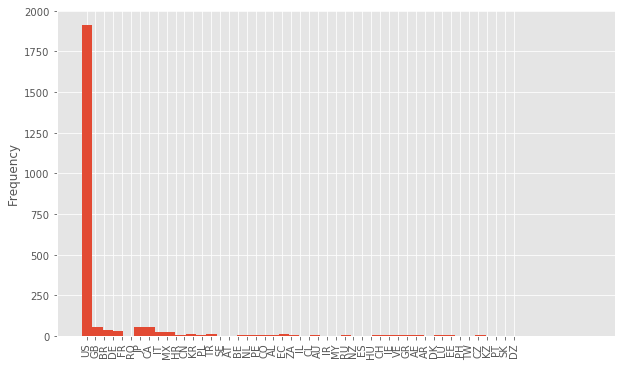

In [4]:
unique_cases = df.drop_duplicates(subset='Patient')
unique_cases['Country'].plot.hist(bins=all_countries.size)
tick_locations = np.arange(0.5, all_countries.size + 0.5)
plt.xticks(tick_locations, country_codes, rotation=90)
plt.show()

The histogram shows that the US, GB, Canada, Japan and Brail are the where most adverse effects were reported (in decreasing order).

Next, let's have a look at the demographics of these reports.

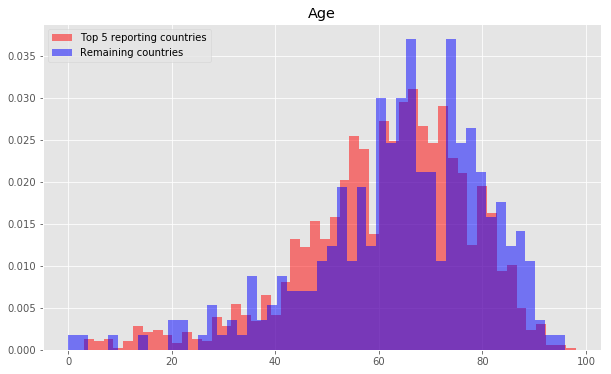

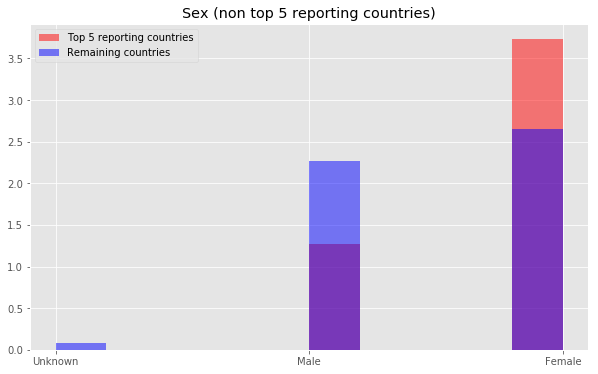

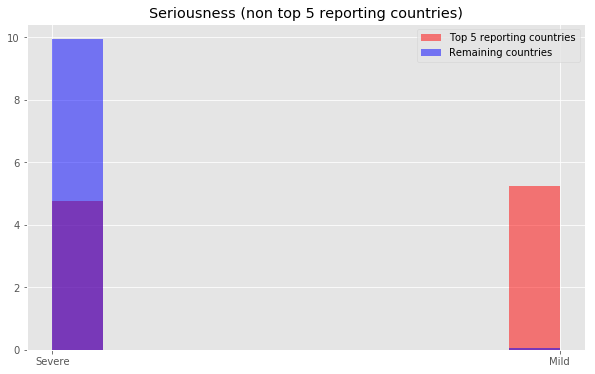

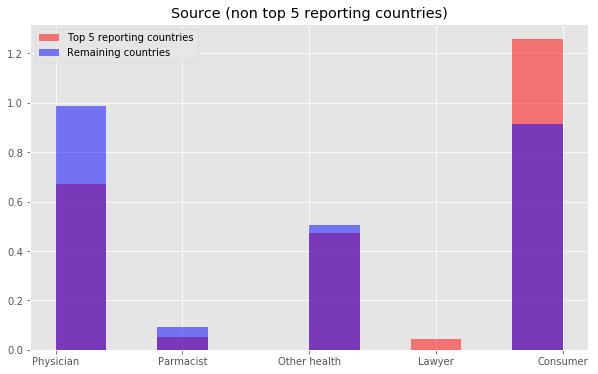

In [5]:
top_country_codes =  [0, 1, 2, 6, 7]
bot_country_codes = [code for code in all_countries if code not in top_country_codes]

top_country_frame = unique_cases[unique_cases['Country'].isin(top_country_codes)]
bottom_country_frame = unique_cases[unique_cases['Country'].isin(bot_country_codes)]

top_country_frame['Age'].hist(bins=50, alpha=0.5, normed=True, color='red')
bottom_country_frame['Age'].hist(bins=50, alpha=0.5, normed=True,color='blue')
plt.title('Age')
plt.legend(['Top 5 reporting countries', 'Remaining countries'])
plt.show()

top_country_frame['Sex'].hist(alpha=0.5, normed=True, color='red')
bottom_country_frame['Sex'].hist(alpha=0.5, normed=True, color='blue')
plt.title('Sex (non top 5 reporting countries)')
plt.xticks([0, 1, 2], ['Unknown', 'Male', 'Female'])
plt.legend(['Top 5 reporting countries', 'Remaining countries'])
plt.show()

top_country_frame['Seriousness'].hist(alpha=0.5, normed=True, color='red')
bottom_country_frame['Seriousness'].hist(alpha=0.5, normed=True, color='blue')
plt.title('Seriousness (non top 5 reporting countries)')
plt.xticks([1, 2], ['Severe', 'Mild'])
plt.legend(['Top 5 reporting countries', 'Remaining countries'])
plt.show()

top_country_frame['Source'].hist(alpha=0.5, normed=True, color='red')
bottom_country_frame['Source'].hist(alpha=0.5, normed=True, color='blue')
plt.title('Source (non top 5 reporting countries)')
plt.xticks([1, 2, 3, 4, 5], ['Physician', 'Parmacist', 'Other health', 'Lawyer', 'Consumer'])
plt.legend(['Top 5 reporting countries', 'Remaining countries'])
plt.show()

In [6]:
# Some basic descriptive stats about this dataset
for variable in ['Age', 'Sex', 'Seriousness', 'Source']:
    print('Top 5 countries: descriptive stats for ' + variable)
    print(top_country_frame[variable].describe(include='all'))
    print('Remaining countries: descriptive stats for ' + variable)
    print(bottom_country_frame[variable].describe(include='all'))
    print('\n')

Top 5 countries: descriptive stats for Age
count    2032.000000
mean       61.469488
std        15.992491
min         3.000000
25%        53.000000
50%        64.000000
75%        73.000000
max        98.000000
Name: Age, dtype: float64
Remaining countries: descriptive stats for Age
count    296.000000
mean      64.324324
std       16.691708
min        0.000000
25%       56.000000
50%       66.000000
75%       76.000000
max       96.000000
Name: Age, dtype: float64


Top 5 countries: descriptive stats for Sex
count    2032.000000
mean        1.745571
std         0.436776
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Sex, dtype: float64
Remaining countries: descriptive stats for Sex
count    296.000000
mean       1.513514
std        0.533444
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Sex, dtype: float64


Top 5 countries: descriptive stats for Seriousness
count

Major conclusions from this exploratory analysis:
- Age: the distribution has a skewed bell shape (possibly modelled by a skewed gaussian or something similar). In the exploratory analysis there does not seem to be any major differences.
- Sex: there is a greater number of adverse reports for women than men, in particular for top 5 reporting countries
- Seriousness: in the top 5 reporting countries, mildly serious cases are reported as much as severe adverse effects (that require hospitalization, etc). But for the remaining countries only severe cases that cause hospitalisation are taken into account.
- Source: In the top 5 reporting countries, consumers and lawyers more actively engage in reporting adverse effects than in other countries.

Now let's examine the adverse effects reported in each of the countries

In [7]:
unique_reactions = df['Reaction'].unique()
reactions = df.pivot_table(values='Patient', index='Country', columns='Reaction', aggfunc='count').fillna(0)
top_country_reactions = reactions.iloc[top_country_codes,:]

# How much each country contributes to a total reaction
top_country_contribution = top_country_reactions.div(top_country_reactions.sum(axis=0), axis=1)
top_country_contribution

Reaction,0,1,2,3,4,5,6,7,8,9,...,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361
Country,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.973913,0.914894,1.0,0.959732,0.966216,0.979899,0.917526,0.727273,0.952381,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.000000,0.049645,0.0,0.006711,0.000000,0.000000,0.000000,0.000000,0.030612,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.026087,0.003546,0.0,0.033557,0.000000,0.000000,0.082474,0.000000,0.010204,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.000000,0.031915,0.0,0.000000,0.033784,0.020101,0.000000,0.272727,0.006803,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# How much each reaction contributes to a total of the country
top_country_reaction_percent = top_country_reactions.div(top_country_reactions.sum(axis=1), axis=0)
top_country_reaction_percent

Reaction,0,1,2,3,4,5,6,7,8,9,...,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361
Country,,,,,,,,,,,,,,,,,,,,,
0,0.002758,0.006864,0.015812,0.002084,0.008764,0.008764,0.011951,0.005454,0.000490,0.017160,...,0.000000,0.000000,0.000000,0.000000,0.000368,0.000368,0.000000,0.000000,0.000306,0.000306
1,0.000000,0.000000,0.010980,0.000000,0.000784,0.000000,0.000000,0.000000,0.000000,0.007059,...,0.000000,0.000000,0.000000,0.001569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.002863,0.000954,0.000000,0.004771,0.000000,0.000000,0.007634,0.000000,0.002863,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000954,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.023438,0.000000,0.000000,0.013021,0.010417,0.000000,0.007812,0.005208,...,0.010417,0.010417,0.010417,0.000000,0.000000,0.000000,0.000000,0.002604,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# Sanity check!
top_country_reaction_percent.sum(axis=1)
top_country_contribution.sum(axis=0)

Reaction
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
1331    1.0
1332    1.0
1333    1.0
1334    1.0
1335    1.0
1336    1.0
1337    1.0
1338    1.0
1339    1.0
1340    1.0
1341    1.0
1342    1.0
1343    1.0
1344    1.0
1345    1.0
1346    1.0
1347    1.0
1348    1.0
1349    1.0
1350    1.0
1352    1.0
1353    1.0
1354    1.0
1355    1.0
1356    1.0
1357    1.0
1358    1.0
1359    1.0
1360    1.0
1361    1.0
Length: 1360, dtype: float64

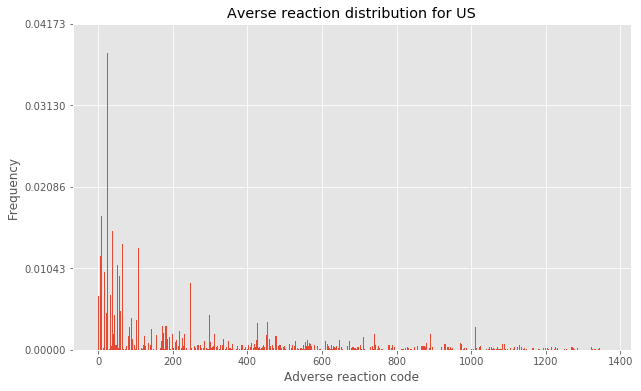

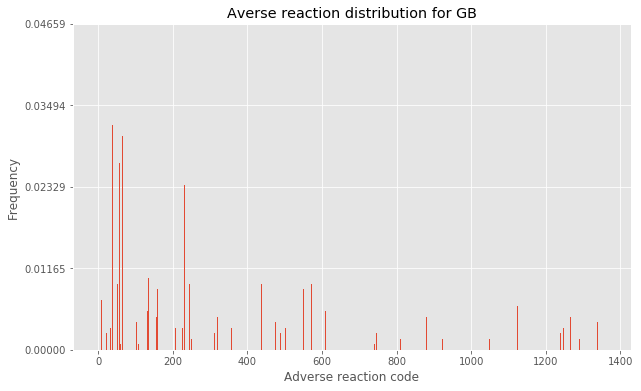

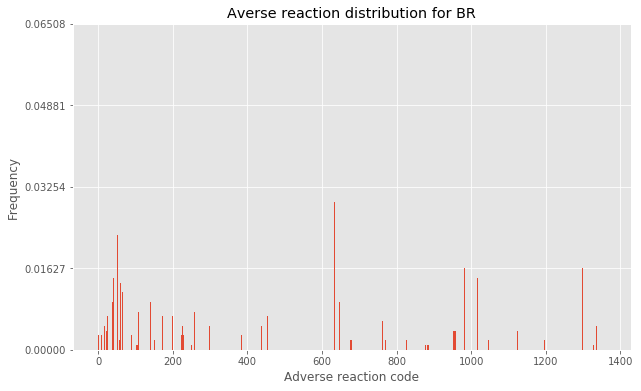

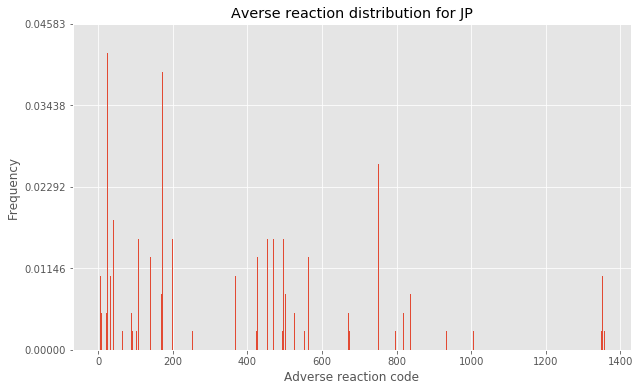

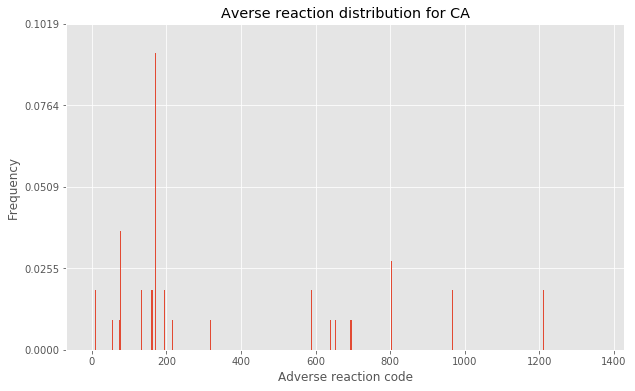

In [10]:
for country in range(len(top_country_reactions)):
    country_distribution = top_country_reaction_percent.iloc[country,:]
    plt.bar(np.arange(0, len(unique_reactions)), country_distribution)
    max_height = np.max(country_distribution) * 1.1
    plt.yticks([0, 0.25 * max_height, 0.5 * max_height, 0.75 * max_height, max_height])
    plt.xlabel('Adverse reaction code')
    plt.ylabel('Frequency')
    plt.title('Averse reaction distribution for ' + country_codes[top_country_codes[country]])
    plt.show()

When analysing the frequency of cases of adverse reactions across the top 5 countries, it becomes clear that the adverse reactions for hypertension medication vary considerably from country to country. For example, Brazil, Canada and Japan have significantly different distributions among each other.